In [8]:
import json
import matplotlib.pyplot as plt
import copy
import numpy as np

In [9]:
data_structure = {
  "rnd": 0,
  "global_loss": 0,
  "global_accuracy": 0,
  "f1_score": 0
  }

In [10]:
shared = []
not_shared = []

In [11]:
for round in range(1, 21):
    data = copy.deepcopy(data_structure)
    try_1 = f'./../results/mnist-100/{round}.json'
    try_1_data = json.load(open(try_1))

    data['rnd'] = try_1_data['rnd']
    data['global_loss'] = try_1_data['global_loss']
    data['global_accuracy'] = try_1_data['global_accuracy']
    data['f1_score'] = try_1_data['f1_score']

    shared.append(data)

In [12]:
for round in range(0, 20):
    data = copy.deepcopy(data_structure)
    try_1 = f'./../without-model-sharing/results/mnist-100/{round}.json'

    try_1_data = json.load(open(try_1))

    data['rnd'] = round + 1
    data['global_loss'] = try_1_data['loss']
    data['global_accuracy'] = try_1_data['accuracy']
    data['f1_score'] = try_1_data['f1_score']

    not_shared.append(data)

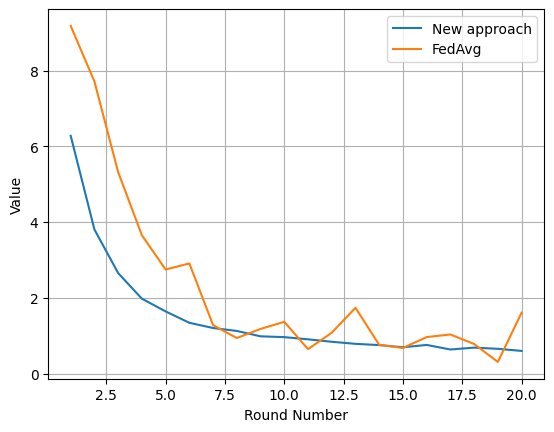

In [13]:
round_numbers = [data["rnd"] for data in shared]
shared_loss = [data["global_loss"] for data in shared]
not_shared_loss = [data["global_loss"] for data in not_shared]

plt.plot(round_numbers, shared_loss, label="New approach")
plt.plot(round_numbers, not_shared_loss, label="FedAvg")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.legend()

plt.grid(True)
plt.show()

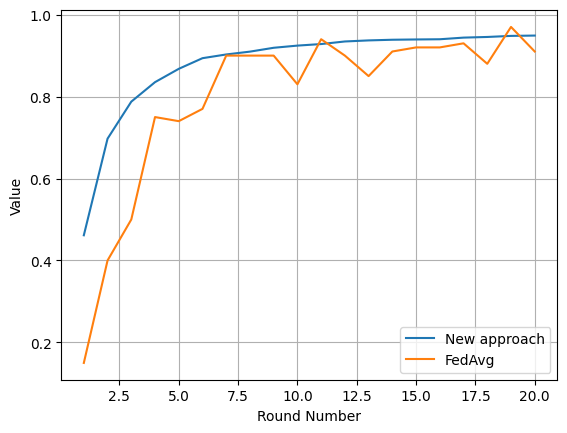

In [14]:
round_numbers = [data["rnd"] for data in shared]
shared_accuracy = [data["global_accuracy"] for data in shared]
not_shared_accuracy = [data["global_accuracy"] for data in not_shared]

plt.plot(round_numbers, shared_accuracy, label="New approach")
plt.plot(round_numbers, not_shared_accuracy, label="FedAvg")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.legend()

plt.grid(True)
plt.show()

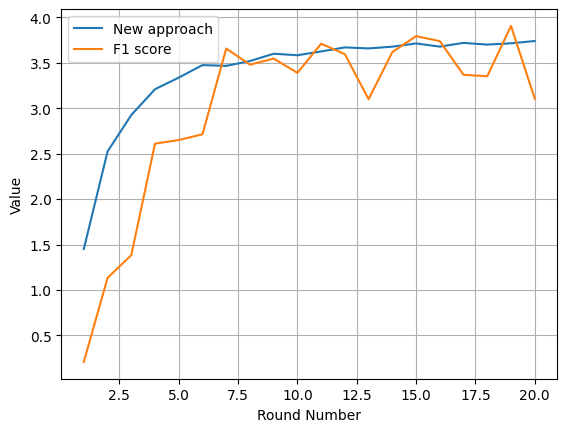

In [15]:
round_numbers = [data["rnd"] for data in shared]
shared_accuracy = [data["f1_score"] for data in shared]
not_shared_accuracy = [data["f1_score"] for data in not_shared]

plt.plot(round_numbers, shared_accuracy, label="New approach")
plt.plot(round_numbers, not_shared_accuracy, label="F1 score")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.legend()

plt.grid(True)
plt.show()